In [54]:
import pandas as pd
import numpy as np
import pickle
import sys
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import gc

In [2]:
datapath = sys.path[0] + '/wafer-map-hw2/train_set.pkl'

with open(datapath, "rb") as file:
    df = pickle.load(file)
    
print("Original columns: ", df.columns)
print(datapath)

Original columns:  Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'failureType', 'wafer_size', 'failureNum'],
      dtype='object')
C:\Users\alexc\OneDrive\Documents\Taiwan Classes\Second Semester\Introduction to Artificial Intelligence\Kaggle\HW2/wafer-map-hw2/train_set.pkl


In [3]:
df = df[["waferMap","failureType","wafer_size","failureNum"]]

In [4]:
df.head()

,waferMap,failureType,wafer_size,failureNum
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,"(45, 48)",8
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,"(45, 48)",8
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,"(45, 48)",8
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,"(45, 48)",8
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,"(45, 48)",8


In [5]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,waferMap,failureType,wafer_size,failureNum,waferMapDim
111562,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",none,"(27, 25)",8,"(27, 25)"
1500,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1,...",none,"(26, 26)",8,"(26, 26)"
16985,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...",none,"(27, 27)",8,"(27, 27)"
5378,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",none,"(26, 26)",8,"(26, 26)"
2145,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,...",none,"(26, 26)",8,"(26, 26)"


In [6]:
#mapping_traintest = {'Training': 0, 'Test': 1}
mapping_type = {'Center':0, 'Donut':1, 'Edge-Loc':2, 'Edge-Ring':3,
         'Loc':4, 'Random':5, 'Scratch':6, 'Near-full':7, 'none':8}

In [7]:
pd.set_option('display.max_rows', 50)

df['wafer_size'].value_counts()

(25, 27)    15684
(27, 25)     9235
(26, 26)     6369
(38, 36)     1877
(33, 37)     1804
            ...  
(67, 65)        1
(63, 63)        1
(52, 53)        1
(56, 63)        1
(53, 44)        1
Name: wafer_size, Length: 335, dtype: int64

In [8]:
img_size = 60

def resizemap(waferMap):
    return cv2.resize(waferMap,(img_size,img_size))

df["resized_waferMap"] = df.waferMap.apply(resizemap)

In [9]:
df.sort_values(by = "wafer_size")

,waferMap,failureType,wafer_size,failureNum,waferMapDim,resized_waferMap
109448,"[[0, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...",none,"(15, 3)",8,"(15, 3)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
10894,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc,"(22, 35)",2,"(22, 35)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9630,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center,"(22, 35)",0,"(22, 35)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
20786,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc,"(22, 50)",2,"(22, 50)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
21631,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc,"(22, 50)",2,"(22, 50)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...
12696,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center,"(212, 84)",0,"(212, 84)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
10870,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch,"(212, 84)",6,"(212, 84)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
10421,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Loc,"(212, 84)",4,"(212, 84)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
12697,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch,"(212, 84)",6,"(212, 84)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [10]:
#for i,img in enumerate(df.resized_waferMap):   
    #plt.imsave(sys.path[0]+"\images"+"\wafermap_"+str(i)+".png", img)
    
    ##Show images: Don't show all of them
    ##plt.imshow(img)
    ##plt.show()

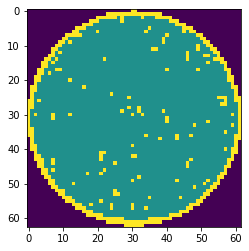

In [11]:
#Plot Original Image
img = df["waferMap"][12359]
plt.imshow(img,)# cmap = "gray")
plt.show()

In [12]:
df.resized_waferMap[0].shape

(60, 60)

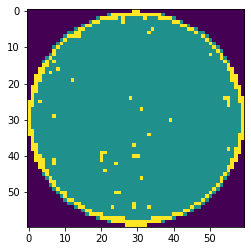

In [13]:
#Plot Normalized Image
img = df["resized_waferMap"][12359]
plt.imshow(img,)# cmap = "gray")
plt.show()

In [14]:
#%%time
#scale the image


#def normalizing(wafer_map):
    #return tf.keras.utils.normalize(wafer_map)

#df['resized_waferMap'] = df['resized_waferMap'].apply(normalizing)

In [15]:
from sklearn.utils import shuffle

#random shuffle the df
df = shuffle(df)
df.head()

,waferMap,failureType,wafer_size,failureNum,waferMapDim,resized_waferMap
77209,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",none,"(25, 27)",8,"(25, 27)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7507,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",Edge-Ring,"(38, 36)",3,"(38, 36)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,...",none,"(26, 26)",8,"(26, 26)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
68356,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",none,"(25, 27)",8,"(25, 27)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
202,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",none,"(26, 26)",8,"(26, 26)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


### Experimental 

In [16]:
%%time
X = np.zeros((df.shape[0], img_size, img_size))

for i in range(df.shape[0]):
    image = df.iloc[i].resized_waferMap
    #X[i] = resizemap(image)
    X[i] = image

CPU times: total: 4.55 s
Wall time: 4.55 s


In [17]:
X.shape

(54355, 60, 60)

In [18]:
np.set_printoptions(threshold=sys.maxsize)
X[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 2., 2., 2., 2.,
        2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 2., 2., 2., 2.,
        2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1

In [19]:
X = X.reshape((-1, img_size, img_size, 1))

In [20]:
X.shape

(54355, 60, 60, 1)

In [21]:
np.set_printoptions(threshold=sys.maxsize)
int(X[0,0,6])

0

In [22]:
%%time

X_all= np.zeros((len(X), img_size, img_size, 3))

for w in range(len(X)):
    for i in range(img_size):
        for j in range(img_size):
            X_all[w, i, j, int(X[w, i, j])] = 1

CPU times: total: 1min 35s
Wall time: 1min 35s


In [23]:
np.set_printoptions(threshold=sys.maxsize)
int(X_all[0,0,6,0])

1

In [24]:
X[3,40,3]

array([1.])

In [25]:
X_all.shape

(54355, 60, 60, 3)

In [26]:
X_all[3,40,3,1]

1.0

In [27]:
y = np.array(df.failureNum)

In [28]:
y

array([8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 3, 8, 8, 8, 8, 3, 3, 2,
       8, 8, 8, 3, 8, 2, 8, 8, 8, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       3, 8, 8, 8, 8, 0, 8, 8, 8, 8, 3, 5, 0, 8, 8, 8, 0, 8, 0, 8, 3, 0,
       0, 8, 4, 2, 3, 8, 3, 8, 8, 4, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 3, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 2, 8, 8, 8, 8, 8, 3, 8, 8, 0,
       8, 8, 2, 3, 3, 5, 8, 8, 8, 0, 8, 8, 2, 8, 8, 3, 0, 3, 3, 3, 8, 8,
       8, 8, 3, 8, 8, 8, 8, 8, 4, 8, 3, 2, 3, 8, 3, 8, 8, 8, 8, 3, 3, 2,
       0, 8, 3, 8, 8, 0, 3, 8, 8, 8, 8, 8, 3, 3, 0, 8, 8, 3, 8, 8, 8, 8,
       3, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 8, 8, 8, 1,
       8, 6, 6, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 3, 6, 8, 3, 8, 8,
       8, 8, 8, 0, 8, 3, 8, 8, 8, 3, 5, 8, 8, 8, 3, 2, 8, 8, 8, 8, 8, 3,
       3, 8, 3, 8, 8, 3, 8, 3, 8, 8, 4, 8, 3, 3, 8, 8, 8, 8, 8, 8, 8, 0,
       2, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 2, 8, 8, 8, 0, 8, 8, 8, 8, 8, 0,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

### Importing to pickle

In [29]:
%%time
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(X_all, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

CPU times: total: 5.7 s
Wall time: 13.6 s


# -------------------------------------------------- 

## Testing Data and Preprocessing it

In [30]:
datapath = sys.path[0] + '/wafer-map-hw2/test_set_all.pkl'

with open(datapath, "rb") as file:
    test = pickle.load(file)
    
print("Original columns: ", test.columns)

Original columns:  Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'wafer_size'],
      dtype='object')


In [31]:
test.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,wafer_size
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,...",533.0,lot40328,1.0,1,"(26, 26)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot40328,2.0,1,"(26, 26)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,...",533.0,lot40328,3.0,1,"(26, 26)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2,...",533.0,lot40328,4.0,1,"(26, 26)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot40328,5.0,1,"(26, 26)"


In [32]:
test['wafer_size'].value_counts()

(30, 34)    12291
(29, 26)    11708
(39, 37)    10104
(33, 29)     8062
(26, 26)     7997
            ...  
(53, 71)        1
(18, 44)        1
(18, 4)         1
(24, 18)        1
(24, 13)        1
Name: wafer_size, Length: 51, dtype: int64

In [33]:
test["resized_waferMap"] = test.waferMap.apply(resizemap)

In [34]:
test.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,wafer_size,resized_waferMap
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,...",533.0,lot40328,1.0,1,"(26, 26)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot40328,2.0,1,"(26, 26)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,...",533.0,lot40328,3.0,1,"(26, 26)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2,...",533.0,lot40328,4.0,1,"(26, 26)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot40328,5.0,1,"(26, 26)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [44]:
%%time
X_test = np.zeros((test.shape[0], img_size, img_size))

for i in range(test.shape[0]):
    image = test.iloc[i].resized_waferMap
    #X[i] = resizemap(image)
    X_test[i] = image

CPU times: total: 12.3 s
Wall time: 12.4 s


In [45]:
X_test.shape

(118595, 60, 60)

In [46]:
X_test[1,1,1]

0.0

In [47]:
X_test = X_test.reshape((-1, img_size, img_size, 1))

In [48]:
X_test.shape

(118595, 60, 60, 1)

In [49]:
X_test[1,1,1,0]

0.0

In [50]:
%%time
X_all_test= np.zeros((len(X_test), img_size, img_size, 3))

for w in range(len(X_test)):
    for i in range(img_size):
        for j in range(img_size):
            X_all_test[w, i, j, int(X_test[w, i, j])] = 1

CPU times: total: 3min 39s
Wall time: 3min 39s


In [51]:
np.set_printoptions(threshold= 10)
X_all_test

array([[[[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        ...,

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]]],


       [[[1., 0., 0.],
         [1., 0., 0.],
         [1., 

In [55]:
del X, X_all,X_test,
gc.collect()

935

In [56]:
%time
pickle_out = open("x_to_predict.pickle","wb")
pickle.dump(X_all_test, pickle_out)
pickle_out.close()

CPU times: total: 0 ns
Wall time: 0 ns


# -------------------------------------------------- END --------------------------------------------------